### Example 1
<a href = "https:////developers.google.com/optimization/mip/integer_opt">Comparing Linear and Integer Optimization</a>

In [25]:
!pip install ortools

from __future__ import print_function
from ortools.linear_solver import pywraplp


def main():
    # with MIP solver
    # Create the mip solver with the CBC backend.
    solver = pywraplp.Solver.CreateSolver('simple_mip_program', 'CBC')


    #with the LP solver
    #solver = pywraplp.Solver('simple_lp_program', pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

    # integer varibale
    infinity = solver.infinity()
    # x and y are integer non-negative variables.
    x = solver.IntVar(0.0, infinity, 'x')
    y = solver.IntVar(0.0, infinity, 'y')

    print('Number of variables =', solver.NumVariables())

    # replace integer varibale  with continuous variables

    #infinity = solver.infinity()
    #x = solver.NumVar(0, infinity, 'x')
    #y = solver.NumVar(0, infinity, 'y')

    print('Number of variables =', solver.NumVariables())

    # x + 7 * y <= 17.5.
    solver.Add(x + 7 * y <= 17.5)

    # x <= 3.5.
    solver.Add(x <= 3.5)

    print('Number of constraints =', solver.NumConstraints())

    # Maximize x + 10 * y.
    solver.Maximize(x + 10 * y)

    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
    else:
        print('The problem does not have an optimal solution.')

    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())
    print('Problem solved in %d branch-and-bound nodes' % solver.nodes())


if __name__ == '__main__':
    main()

SyntaxError: from __future__ imports must occur at the beginning of the file (cell_name, line 5)

### Example 2 
#### The 0/1 Knapsack Problem

    consider the solution of the 0/1 knapsack problem: given a set I of items, each one with a weight $w_{i}$ and estimated profit $p_{i}$, one wants to select a subset with maximum profit such that the summation of the weights of the selected items is less or equal to the knapsack capacity c. Considering a set of decision binary variables $x_{i}$ that receive value 1 if the i-th item is selected, or 0 if not, the resulting mathematical programming formulation is:


\begin{split}\textrm{Maximize: }   &  \\
                               &  \sum_{i \in I} p_i \cdot x_i  \\
\textrm{Subject to: } & \\
                               &  \sum_{i \in I} w_i \cdot x_i \leq c  \\
                               &  x_i \in \{0,1\} \,\,\, \forall i \in I\end{split}


In [ ]:
# install mip library using python 
!pip install mip


In [5]:



from mip import Model, xsum, maximize, BINARY

p = [10, 13, 18, 31, 7, 15] # You can create a large list using 'input'
w = [11, 15, 20, 35, 10, 33]
c, I = 47, range(len(w))

m = Model("knapsack") # calling the model

x = [m.add_var(var_type=BINARY) for i in I]

m.objective = maximize(xsum(p[i] * x[i] for i in I))

m += xsum(w[i] * x[i] for i in I) <= c

m.optimize()

selected = [i for i in I if x[i].x >= 0.99]
print("selected items: {}".format(selected))



selected items: [0, 3]


##### The purpose of this example is to illustrate solving ILP problems using GLPK in CVXOPT in Python.
### Example 3



In [6]:
from cvxopt.glpk import ilp
import numpy as np
from cvxopt import matrix

We will be trying to solve the following ILP problem:
    
$$Min~x_0+x_1+x_2+x_3+x_4+x_5$$

GIven the following constraints:

$$x_0+x_1\ge1$$
$$x_0+x_1+x_5\ge1$$
$$x_2+x_3\ge1$$
$$x_2+x_3+x_4\ge1$$
$$x_3+x_4+x_5\ge1$$
$$x_1+x_4+x_5\ge1$$
$$x_0,x_1,x_2,x_3,x_4,x_5\in~Z$$



##### Now, GLPK ILP solver assumes the following form of the problem.
    

In [8]:
print(help(ilp))


Help on built-in function ilp in module cvxopt.glpk:

ilp(...)
    Solves a mixed integer linear program using GLPK.
    
    (status, x) = ilp(c, G, h, A, b, I, B)
    
    PURPOSE
    Solves the mixed integer linear programming problem
    
        minimize    c'*x
        subject to  G*x <= h
                    A*x = b
                    x[k] is integer for k in I
                    x[k] is binary for k in B
    
    ARGUMENTS
    c            nx1 dense 'd' matrix with n>=1
    
    G            mxn dense or sparse 'd' matrix with m>=1
    
    h            mx1 dense 'd' matrix
    
    A            pxn dense or sparse 'd' matrix with p>=0
    
    b            px1 dense 'd' matrix
    
    I            set of indices of integer variables
    
    B            set of indices of binary variables
    
    status       if status is 'optimal', 'feasible', or 'undefined',
                 a value of x is returned and the status string 
                 gives the status of x.  Other po

#### Thus, for the given problem we have

    1. c: is a 6*1 matrix (since $x_0,..x_x5$ are the decision variables)
    2. G: -1* Coeff. Matrix (Coeff. matrix contains entries $g_{i,j}$ which are either 0 or 1 depending on whether $x_j$ is present in $i^{th}$ constraint or not. **NB**: -1 is needed since the expected form is Gx<=h, whereas we have >= inequalities
    3. h: -1* ones(6*1). There are 6 constraints
    4. A and b are empty
    5. I={0,1,2,3,4,5} since all the decision variables are integer
    6. B={} 

In [10]:
c=matrix(np.ones(6,dtype=float))

In [12]:
print(c)

[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]



In [13]:
coeff=np.array([[1,1,0,0,0,0],
                [1,1,0,0,0,1],
                [0,0,1,1,0,0],
                [0,0,1,1,1,0],
                [0,0,0,1,1,1],
                [0,1,0,0,1,1]
                ],dtype=float)

In [14]:
G=matrix(-coeff)

In [15]:
print (G)

[-1.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-1.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00]
[-0.00e+00 -0.00e+00 -1.00e+00 -1.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -1.00e+00 -1.00e+00 -1.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -1.00e+00 -1.00e+00]
[-0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -1.00e+00]



In [16]:
h=matrix(-1*np.ones(6))

In [19]:
I=set(range(6))

In [18]:
B=set()

In [20]:
print(I,B)

{0, 1, 2, 3, 4, 5} set()


In [21]:
(status,x)=ilp(c,G,h,matrix(1., (0,6)),matrix(1., (0,1)),I,B)

In [22]:
status

'optimal'

In [24]:
print(x)

[ 0.00e+00]
[ 1.00e+00]
[ 0.00e+00]
[ 1.00e+00]
[ 0.00e+00]
[ 0.00e+00]



### Example 4 - Mixed Integer Programming 

#### Mixed/Pure (Linear) Integer Program: an IP (or ILP) s.t. some/all variables are restricted to Z, the others to R.

#### Max: $x+y$


#### Subject to:  

$−$ $2x+2y≥1$

$-$ $8x+ 10y≤13$

$x,y\geq0$



In [3]:
# pulp is one such library which is used for the optimization of linear programming
# import the library pulp 
!pip install pulp
import pulp as p 
import matplotlib.pyplot as plt #it is used for creating scatter line bars, charts, figure, scatter plots etc.
import numpy as np # a whole-some package for performing basic scientific operations 

In [17]:



Lp_prob = p.LpProblem('Problem', p.LpMaximize)  

# Create problem Variables  
x = p.LpVariable("x", lowBound = 0,cat=p.LpInteger)   # Create a variable x >= 0  # integer variable
y = p.LpVariable("y", lowBound = 0,cat=p.LpContinuous)   # Create a variable y >= 0 #Continious Variable

# Objective Function 
Lp_prob +=  x +  y    

# Constraints: 
Lp_prob += -2*x + 2 * y >=1 
Lp_prob += -8*x + 10*y <= 13


# Display the problem 
print(Lp_prob) 

status = Lp_prob.solve()   # Solver 
print(p.LpStatus[status])   # The solution status 

# Printing the final solution 
print(p.value(x), p.value(y), p.value(Lp_prob.objective)) 



Problem:
MAXIMIZE
1*x + 1*y + 0
SUBJECT TO
_C1: - 2 x + 2 y >= 1

_C2: - 8 x + 10 y <= 13

VARIABLES
0 <= x Integer
y Continuous

Optimal
4.0 4.5 8.5


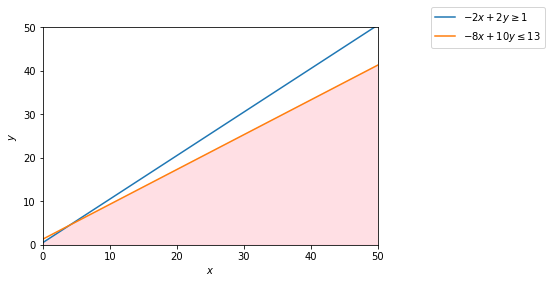

In [9]:
%matplotlib inline
### for graphical represenation 
z = np.linspace(0, 200, 100)
#Constraints
y1 = (1+2*z)/2
y2 = (13+8*z)/10
# Make plot
plt.plot(z, y1, label=r'$-2x+2y\geq1$')
plt.plot(z, y2, label=r'$-8x+10y\leq13$')
plt.xlim(0, 50)
plt.ylim(0, 50)
#Labelling X and Y axis
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, y1)
plt.fill_between(z, y5, color='pink',alpha=0.5)
plt.legend(bbox_to_anchor=(1.5, 1), loc=5, borderaxespad=0.)
plt.show()


### Example 5 (For Practice Purpose)

#### The Traveling Salesman Problem

    considering n points V={0,…,n−1} and a distance matrix Dn×n with elements ci,j∈R+, a solution consists in a set of exactly n (origin, destination) pairs indicating the itinerary of your trip, resulting in the following formulation:


\begin{split}\textrm{Minimize: }   &  \\
&  \sum_{i \in I, j \in I} c_{i,j} \ldotp x_{i,j} \\
\textrm{Subject to: }   &  \\
& \sum_{j \in V \setminus \{i\}} x_{i,j} = 1 \,\,\, \forall i \in V  \\
& \sum_{i \in V \setminus \{j\}} x_{i,j} = 1 \,\,\, \forall j \in V \\
& y_{i} -(n+1)\ldotp x_{i,j} \geq y_{j} -n  \,\,\, \forall i \in V\setminus \{0\}, j \in V\setminus \{0,i\}\\
& x_{i,j} \in \{0,1\} \,\,\, \forall i \in V, j \in V \\
& y_i \geq 0 \,\,\, \forall i \in V\end{split}

In [13]:
from itertools import product
from sys import stdout as out
from mip import Model, xsum, minimize, BINARY

# names of places to visit
places = ['Antwerp', 'Bruges', 'C-Mine', 'Dinant', 'Ghent',
          'Grand-Place de Bruxelles', 'Hasselt', 'Leuven',     #names of the places to visit are informed
          'Mechelen', 'Mons', 'Montagne de Bueren', 'Namur',
          'Remouchamps', 'Waterloo']

# distances in an upper triangular matrix
dists = [[83, 81, 113, 52, 42, 73, 44, 23, 91, 105, 90, 124, 57],
         [161, 160, 39, 89, 151, 110, 90, 99, 177, 143, 193, 100],     #distances are informed in an upper triangular matrix
         [90, 125, 82, 13, 57, 71, 123, 38, 72, 59, 82],
         [123, 77, 81, 71, 91, 72, 64, 24, 62, 63],
         [51, 114, 72, 54, 69, 139, 105, 155, 62],
         [70, 25, 22, 52, 90, 56, 105, 16],
         [45, 61, 111, 36, 61, 57, 70],
         [23, 71, 67, 48, 85, 29],
         [74, 89, 69, 107, 36],
         [117, 65, 125, 43],
         [54, 22, 84],
         [60, 44],
         [97],
         []]

# number of nodes and list of vertices
n, V = len(dists), set(range(len(dists)))

# distances matrix
c = [[0 if i == j
      else dists[i][j-i-1] if j > i
      else dists[j][i-j-1]
      for j in V] for i in V]

model = Model() #creates an empty MIP model

# binary variables indicating if arc (i,j) is used on the route or not
x = [[model.add_var(var_type=BINARY) for j in V] for i in V]

# continuous variable to prevent subtours: each city will have a
# different sequential id in the planned route except the first one
y = [model.add_var() for i in V]

# objective function: minimize the distance
#all binary decision variables for the selection of arcs are created and their references are stored a n×n matrix named x.
model.objective = minimize(xsum(c[i][j]*x[i][j] for i in V for j in V))  


#Differently from the x variables, y variables are not required to be binary or integral, 
#they can be declared just as continuous variables, the default variable type.
# constraint : leave each city only once
for i in V:
    model += xsum(x[i][j] for j in V - {i}) == 1

# constraint : enter each city only once
for i in V:
    model += xsum(x[j][i] for j in V - {i}) == 1

# subtour elimination
for (i, j) in product(V - {0}, V - {0}):
    if i != j:
        model += y[i] - (n+1)*x[i][j] >= y[j]-n

# optimizing
model.optimize()

# checking if a solution was found
if model.num_solutions:
    out.write('route with total distance %g found: %s'
              % (model.objective_value, places[0]))
    nc = 0
    while True:
        nc = [i for i in V if x[nc][i].x >= 0.99][0]
        out.write(' -> %s' % places[nc])
        if nc == 0:
            break
    out.write('\n')

route with total distance 547 found: Antwerp -> Bruges -> Ghent -> Grand-Place de Bruxelles -> Waterloo -> Mons -> Namur -> Dinant -> Remouchamps -> Montagne de Bueren -> C-Mine -> Hasselt -> Leuven -> Mechelen -> Antwerp
